# Perceptron, Adaline et Regression Logistique

In [7]:
from math import exp
from operator import add

def h(x,w):
    """
    Calcul le produit scalaire entre le vecteur caractéristique d'un exemple, x, et le vecteur poids du modèle, w
    """
    # Le premier élément (indice 0) de la liste w est le biais, w0 
    # Le dernier élément de la liste x est la classe de l'exemple
    res=w[0]
    for i in range(len(x)-1): # la boucle s'arrête à l'avant dernier élément de x inclus 
        res+=w[i+1]*x[i]
    return res


def Perceptron(Train,W,eta,d):
    err=0
    for x in Train:
        dp=h(x,W) 
        if(x[d]*dp<=0):
            err+=1
            W[0]+=eta*x[d]
            for j in range(d):
                W[j+1]+=eta*x[d]*x[j]
    return W,err

def Adaline(Train,W,eta,d):
    err=0
    for x in Train:
        W[0]+=2*eta*(x[d]-h(x,W))
        for j in range(d):
            W[j+1]+=2*eta*x[j]*(x[d]-h(x,W))
        if(x[d]*h(x,W)<=0):
            err+=1
    return W,err

def sigma(z):
    """
    Fonction logisitque
    """
    return (1/(1+exp(-z)))


def Logistique(Train,W,eta,d):
    err=0
    for x in Train:
        errlog=(1.0-sigma(x[d]*h(x,W)))
        W[0]+=eta*(x[d]*errlog)
        for j in range(d):
            W[j+1]+=eta*(x[d]*x[j]*errlog)
        if(x[d]*h(x,W)<=0):
            err+=1
    return W,err

def ERM(Train,MaxEpoch,eta,mod='p'):
    """
    Algorithme de la minimisation du risque empirique
    """
    # Initialisation des poids à 0
    W=[0.0 for i in range(len(Train[0]))]
    epoch=0
    err=1
    d=len(Train[0])-1
    E=[]
    new=W
    while (epoch<MaxEpoch and err!=0):
        epoch+=1
        if(mod=='p'):
            W,err=Perceptron(Train,W,eta,d)
        elif(mod=='a'):
            W,err=Adaline(Train,W,eta,d)
        elif(mod=='r'):
            W,err=Logistique(Train,W,eta,d)

        erreur=float(err)/float(len(Train))
        E.append(erreur)

    return W,E

In [8]:
def PerfTest(X,W):
    """
    Programme test qui rennvoie le nombre d'erreurs sur une base test
    """
    err=0.0
    d=len(X[0])-1
    for x in X:
        dp=h(x[0:d],W)
        if (x[d]*dp<=0.0):
            err+=1.0
    return err/len(X)

Erreur Test Perceptron= 0.19148936170212766
Erreur Test Adaline= 0.15602836879432624
Erreur Test Regression Logistique= 0.14184397163120568


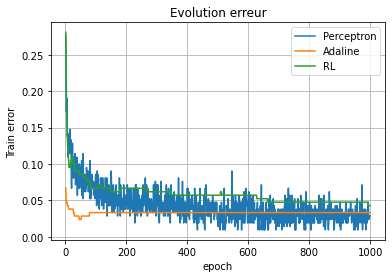

In [9]:
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os.path
from os import path

def plotting(X,Y,strtitle,strxlabel,strylabel,lbl):
    plt.plot(X, Y, label=lbl)
    plt.yscale('linear')
    plt.title(strtitle)
    plt.xlabel(strxlabel)
    plt.ylabel(strylabel)
    plt.legend()
    plt.grid(True)
    
def ConstTrainTest(filename):
    tag_df=pd.read_table(filename,sep=' ',header=None)
    X=[]
    for e in range(len(tag_df)):
        x=list(tag_df.loc[e,:])
        cls=x.pop(0)
        x.insert(len(x),cls)
        X.append(x)
    return X


Train=ConstTrainTest("Collections/IONO-Train")
Test=ConstTrainTest("Collections/IONO-Test")


Wp,ListErrP=ERM(Train,1000,0.01,mod='p')
AbsP=[i+1 for i in range(len(ListErrP))]

Wa,ListErrA=ERM(Train,1000,0.01,mod='a')
AbsA=[i+1 for i in range(len(ListErrA))]

Wr,ListErrR=ERM(Train,1000,0.01,mod='r')
AbsR=[i+1 for i in range(len(ListErrR))]


plotting(AbsP,ListErrP,'Evolution erreur', 'epoch', 'Train error','Perceptron')
plotting(AbsA,ListErrA,'Evolution erreur', 'epoch', 'Train error','Adaline')
plotting(AbsR,ListErrR,'Evolution erreur', 'epoch', 'Train error','RL')

print('Erreur Test Perceptron=',PerfTest(Test,Wp))
print('Erreur Test Adaline=',PerfTest(Test,Wa))
print('Erreur Test Regression Logistique=',PerfTest(Test,Wr))
